In [1]:
from pathlib import Path
import math

In [2]:
import pandas as pd
import numpy as np
from scipy import stats

In [3]:
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-dark')
# plt.style.available
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['lines.linewidth'] = 2.0

In [4]:
import cufflinks as cf
cf.set_config_file(offline=True, theme='solar')
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
pio.templates.default = pio.templates["plotly_dark"]

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
from helper import plot_asset_path, plot_probability, plot_binomial_tree

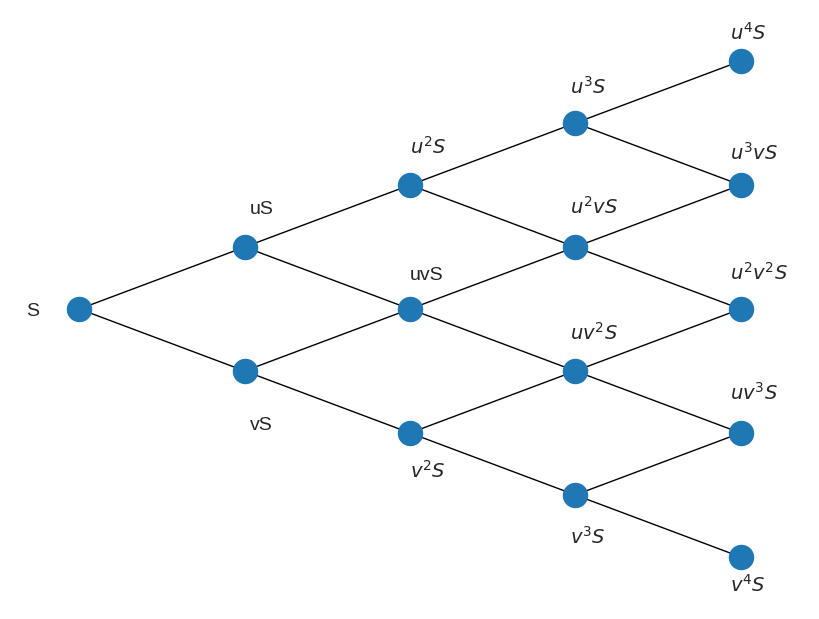

In [7]:
plot_asset_path()

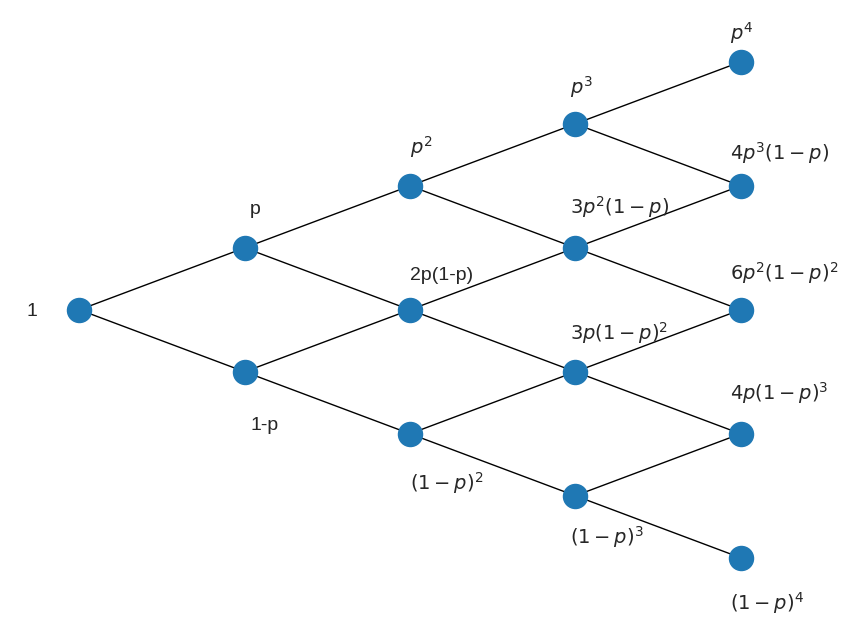

In [8]:
plot_probability()

In [38]:
# Create a user defined function
def binomial_option(spot, strike, rate, sigma, time, steps, output=0):
    """
    binomial_option(spot, strike, rate, sigma, time, steps, output=0)
    Function for building binomial option tree for european call option payoff
    Params
    ------
    spot int or float - spot price
    strike int or float - strike price
    rate float - interest rate
    sigma float - volatility
    time int or float - expiration time
    steps int - number of trees
    output int - [0: price, 1: payoff, 2: option value, 3: option delta]
    Returns
    -------
    out: ndarray
    An array object of price, payoff, option value and delta specified by the output parameter
    """
    # params
    ts = time/steps
    u = 1+sigma*np.sqrt(ts)            # up move
    v = 1- sigma*np.sqrt(ts)           # down move
    p = 0.5+rate*np.sqrt(ts)/(2*sigma) # probablity 
    df = 1/(1+rate*ts)                 # discount factor
    # initialize arrays
    px = zeros((steps+1, steps+1)) # stock  price
    cp = zeros((steps+1, steps+1)) # option payoff
    V = zeros((steps+1, steps+1))  # option value
    d = zeros((steps+1, steps+1))  # option delta
    # binomial loop
    # forward loop
    for j in range(steps+1):
        for i in range(j+1): # loop for triangular matrix
            # calculate stock price, baiscally what plot_asset_path() is showing
            px[i,j] = spot*np.power(v,i)*np.power(u,j-i)
    
    # calculate option payoff based on spot and strike
    cp = np.maximum(px-strike, 0)
    
    # reverse loop
    for j in range(steps+1, 0, -1):
        for i in range(j): # loop for triangular matrix
            if j < steps+1:
                # option value = discount_factor*[(1-p)*V_up + (1-p)*V_down]
                V[i,j-1] = df * (p*V[i,j]+(1-p)*V[i+1,j])
                # option delta = dV / dS 
                d[i,j-1] = (V[i,j]-V[i+1,j])/(px[i,j]-px[i+1,j])
            else:
                # last row hits boundry so special logic for it
                # option value is option payoff, delta at expiery is 0
                V[i,j-1] = cp[i,j-1]
                d[i,j-1] = 0
                

    # select ouptut
    results = np.around(px,2), np.around(cp,2), np.around(V,2), np.around(d,4)
    return results[output]

In [39]:
spot, strike, rate, sigma, time, steps = 100, 100, 0.05, 0.2, 1, 4

In [53]:
x = 13

x**2 - 159

10

In [40]:
# Asset price
px = binomial_option(spot, strike, rate, sigma, time, steps,0)
px

array([[100.  , 110.  , 121.  , 133.1 , 146.41],
       [  0.  ,  90.  ,  99.  , 108.9 , 119.79],
       [  0.  ,   0.  ,  81.  ,  89.1 ,  98.01],
       [  0.  ,   0.  ,   0.  ,  72.9 ,  80.19],
       [  0.  ,   0.  ,   0.  ,   0.  ,  65.61]])

In [41]:
# Intrinsic value of call options
cp = binomial_option(spot, strike, rate, sigma, time, steps,1)
cp

array([[ 0.  , 10.  , 21.  , 33.1 , 46.41],
       [ 0.  ,  0.  ,  0.  ,  8.9 , 19.79],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ]])

In [42]:
# Option price
opx = binomial_option(spot, strike, rate, sigma, time, steps,2)
opx

array([[10.29, 15.88, 23.83, 34.33, 46.41],
       [ 0.  ,  3.39,  6.11, 10.99, 19.79],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ]])

In [43]:
# Option delta
d = binomial_option(spot, strike, rate, sigma, time, steps,3)
d

array([[0.6241, 0.8053, 0.9645, 1.    , 0.    ],
       [0.    , 0.3393, 0.5553, 0.9086, 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    ]])

In [19]:
# Binomial Option Price
print(f"European Call Option Price using Binomial Tree Method: {opx[0,0]:.2f}")

European Call Option Price using Binomial Tree Method: 10.29


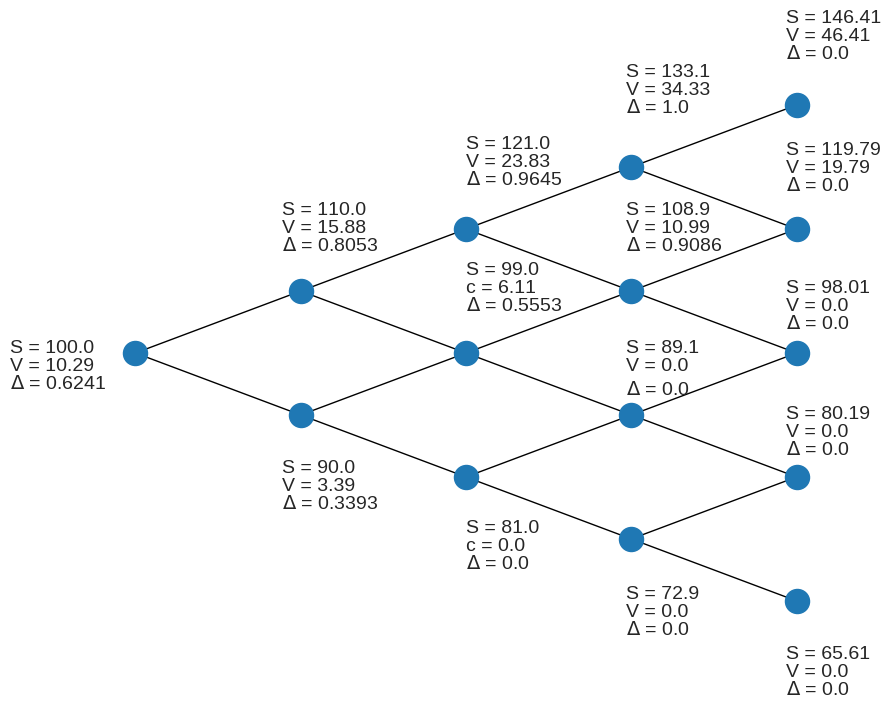

In [20]:
# Plot a 4-Step Binomial Tree
plot_binomial_tree(px[0,0], px, opx, d)